In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

import matplotlib.pylab as plt

In [2]:
data_df = pd.read_csv("WestRoxbury_V2.csv")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
data_df.head()

TOTAL VALUE      TAX  LOT SQFT   YR BUILT  GROSS AREA   LIVING AREA  \
0         344.2  4330.0     9965.0    1880.0       2436.0       1352.0   
1         412.6  5190.0     6590.0    1945.0       3108.0       1976.0   
2         330.1  4152.0     7500.0    1890.0       2294.0       1371.0   
3         498.6  6272.0    13773.0       NaN       5032.0       2608.0   
4         331.5  4170.0     5000.0    1910.0       2370.0       1438.0   

   FLOORS   ROOMS  BEDROOMS   FULL BATH  HALF BATH  KITCHEN  FIREPLACE REMODEL  
0      NaN    6.0        3.0        1.0        1.0      1.0        0.0    None  
1      2.0   10.0        4.0        NaN        1.0      1.0        0.0  Recent  
2      2.0    NaN        4.0        1.0        1.0      1.0        0.0    None  
3      1.0    9.0        5.0        1.0        1.0      1.0        1.0     NaN  
4      2.0    7.0        3.0        2.0        0.0      1.0        0.0    None

In [4]:
data_df.tail()

TOTAL VALUE      TAX  LOT SQFT   YR BUILT  GROSS AREA   LIVING AREA  \
5797         404.8  5092.0     6762.0    1938.0       2594.0       1714.0   
5798         407.9  5131.0     9408.0    1950.0       2414.0       1333.0   
5799         406.5  5113.0     7198.0    1987.0       2480.0       1674.0   
5800         308.7  3883.0     6890.0    1946.0       2000.0       1000.0   
5801         447.6  5630.0     7406.0    1950.0       2510.0       1600.0   

      FLOORS   ROOMS  BEDROOMS   FULL BATH  HALF BATH  KITCHEN  FIREPLACE  \
5797      2.0    9.0        3.0        2.0        1.0      1.0        1.0   
5798      2.0    6.0        3.0        1.0        1.0      1.0        1.0   
5799      2.0    7.0        3.0        1.0        1.0      1.0        1.0   
5800      1.0    5.0        2.0        1.0        0.0      1.0        0.0   
5801      2.0    7.0        3.0        1.0        1.0      1.0        1.0   

     REMODEL  
5797  Recent  
5798    None  
5799    None  
5800    None  
5801    None

In [5]:
data_df.describe()

TOTAL VALUE            TAX     LOT SQFT      YR BUILT  GROSS AREA   \
count   5215.000000   5239.000000   5232.000000  5200.000000  5222.000000   
mean     392.950953   4938.317618   6277.638761  1937.102692  2931.192264   
std       99.886819   1249.520551   2673.370004    25.461810   891.574951   
min      105.000000   1320.000000    997.000000  1798.000000   821.000000   
25%      325.200000   4086.000000   4774.500000  1920.000000  2348.250000   
50%      375.200000   4728.000000   5680.000000  1935.000000  2704.000000   
75%      438.750000   5521.500000   7037.250000  1955.000000  3244.000000   
max     1217.800000  15319.000000  46411.000000  2011.000000  8154.000000   

       LIVING AREA      FLOORS         ROOMS    BEDROOMS     FULL BATH  \
count  5221.000000  5209.000000  5192.000000  5228.000000  5236.000000   
mean   1651.466769     1.680745     6.998459     3.231064     1.297746   
std     534.431399     0.446349     1.444670     0.846659     0.523892   
min     504.000000     1.000000     3.000000     1.000000     1.000000   
25%    1306.000000     1.000000     6.000000     3.000000     1.000000   
50%    1544.000000     2.000000     7.000000     3.000000     1.000000   
75%    1871.000000     2.000000     8.000000     4.000000     2.000000   
max    4658.000000     3.000000    14.000000     9.000000     5.000000   

         HALF BATH      KITCHEN    FIREPLACE  
count  5241.000000  5219.000000  5221.000000  
mean      0.615913     1.015520     0.740471  
std       0.533216     0.123621     0.561084  
min       0.000000     1.000000     0.000000  
25%       0.000000     1.000000     0.000000  
50%       1.000000     1.000000     1.000000  
75%       1.000000     1.000000     1.000000  
max       3.000000     2.000000     4.000000

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5802 entries, 0 to 5801
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TOTAL VALUE   5215 non-null   float64
 1   TAX           5239 non-null   float64
 2   LOT SQFT      5232 non-null   float64
 3   YR BUILT      5200 non-null   float64
 4   GROSS AREA    5222 non-null   float64
 5   LIVING AREA   5221 non-null   float64
 6   FLOORS        5209 non-null   float64
 7   ROOMS         5192 non-null   float64
 8   BEDROOMS      5228 non-null   float64
 9   FULL BATH     5236 non-null   float64
 10  HALF BATH     5241 non-null   float64
 11  KITCHEN       5219 non-null   float64
 12  FIREPLACE     5221 non-null   float64
 13  REMODEL       5230 non-null   object 
dtypes: float64(13), object(1)
memory usage: 634.7+ KB


In [7]:
data_df = data_df[data_df['YR BUILT'] > 0]

In [8]:
data_df['REMODEL'].value_counts()

None      3515
Recent     722
Old        453
Name: REMODEL, dtype: int64

In [9]:
# Some characters cause problems in names, so we change those characters (empty space and hyphens) into underscores

data_df.columns = [s.strip().replace(' ', '_') for s in data_df.columns] # change spaces into underscores in variable names
data_df.columns = [s.strip().replace('-', '_') for s in data_df.columns] # change hyphens into underscores in variable names
data_df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

#### Scatterplots

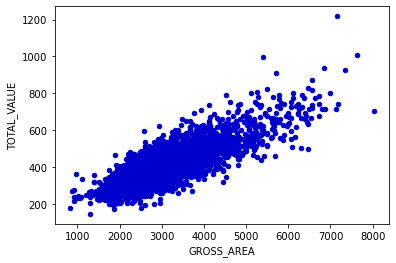

In [10]:
# the basic pandas scatterplot
data_df.plot.scatter(x='GROSS_AREA', y='TOTAL_VALUE', legend=False, color='mediumblue')

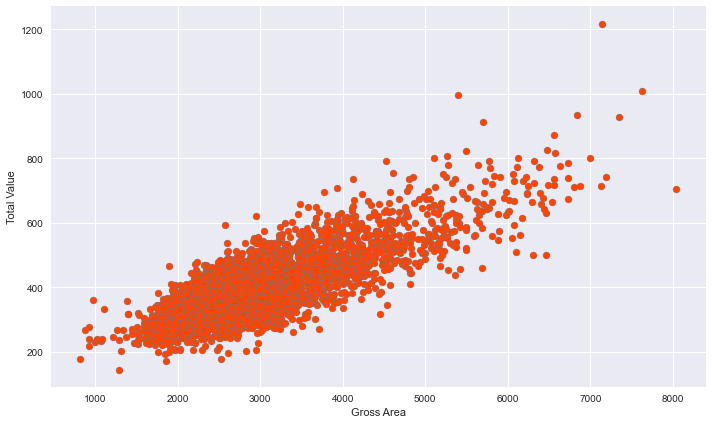

In [31]:
# Matplotlib scatterplot

fig, ax = plt.subplots() # extracts two elements, fig (the picture itself) and ax (the plot or graph)

fig.set_size_inches(10, 6) # sets the size of the plot to 10 x 6 inches

ax.scatter(data_df.GROSS_AREA, data_df.TOTAL_VALUE, color='steelblue', facecolor='orangered') # assigns scatterplot

plt.xlabel('Gross Area') # axis labels may be different than the variable names
plt.ylabel('Total Value')

plt.tight_layout() # makes the size of the plot the same as the frame (no margin)

plt.show() # this is required to display the plot

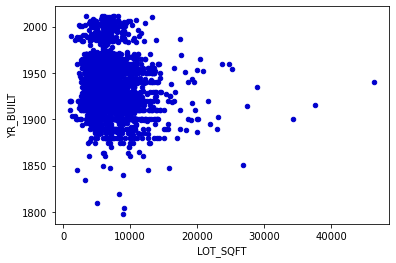

In [12]:
data_df.plot.scatter(x='LOT_SQFT', y='YR_BUILT', legend=False, color='mediumblue')

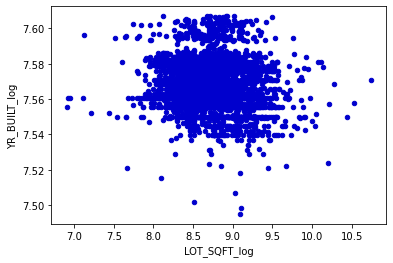

In [13]:
# log transform variable(s) before plotting to reveal patterns

data_df['LOT_SQFT_log'] = np.log((data_df.LOT_SQFT)+1)

data_df['YR_BUILT_log'] = np.log((data_df.YR_BUILT)+1)

# the basic pandas scatterplot
data_df.plot.scatter(x='LOT_SQFT_log', y='YR_BUILT_log', legend=False, color='mediumblue')

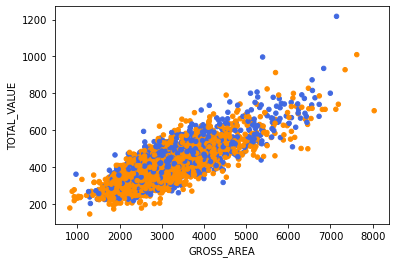

In [14]:
# Add a categorical variable to a scatterplot

data_df.plot.scatter(x='GROSS_AREA', y='TOTAL_VALUE', 
                     c=['darkorange' if c == "None" else 'royalblue' for c in data_df.REMODEL])

#### Bar Charts

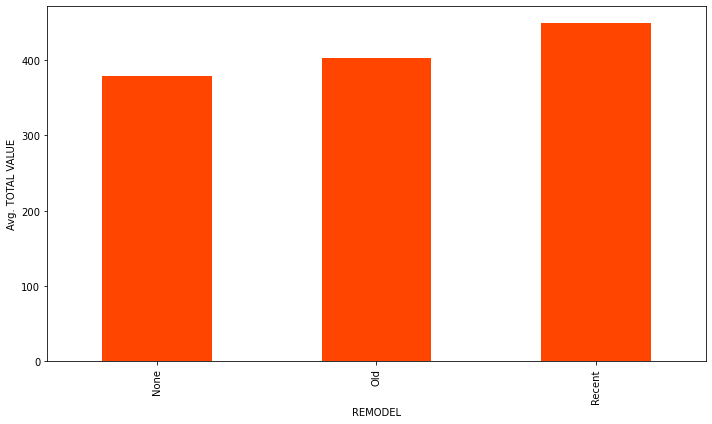

In [15]:
ax = data_df.groupby('REMODEL').mean().TOTAL_VALUE.plot(kind='bar', figsize=[10, 6], color='orangered')

ax.set_ylabel('Avg. TOTAL VALUE')

plt.tight_layout()
plt.show()

#### Line Graph

In [16]:
bike_df = pd.read_csv('bicycle_by_day.csv', squeeze=True)

In [17]:
bike_df.head()

instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [18]:
bike_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

In [19]:
bike_df['Date'] = pd.to_datetime(bike_df.dteday, format='%m/%d/%Y')

rental_ts = pd.Series(bike_df.cnt.values, index=bike_df.Date)

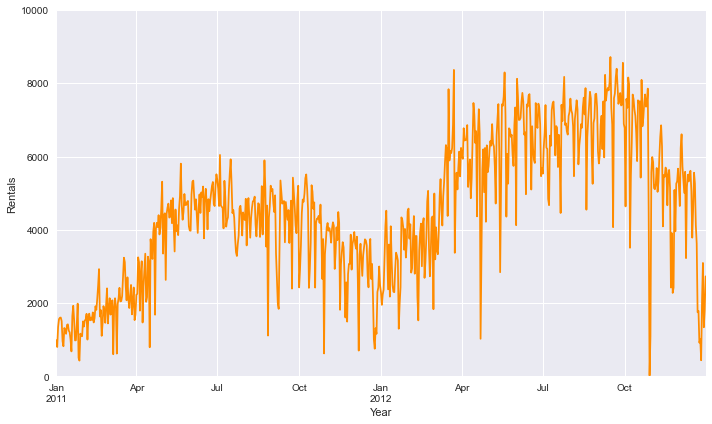

In [32]:
rental_ts.plot(ylim=[0, 10000], 
               legend=False, 
               figsize=[10, 6], 
               color='darkorange')

plt.xlabel('Year')  # set x-axis label
plt.ylabel('Rentals')  # set y-axis label

plt.tight_layout()
plt.show()

#### Boxplots

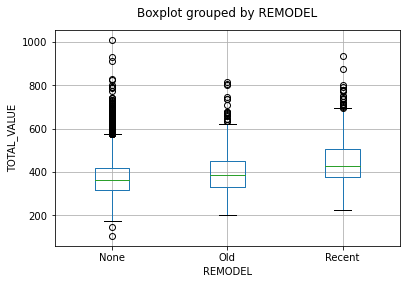

In [21]:
ax = data_df.boxplot(column='TOTAL_VALUE', by='REMODEL')

ax.set_ylabel('TOTAL_VALUE')

#plt.suptitle('')  # Suppress the titles
plt.title('')

plt.show()

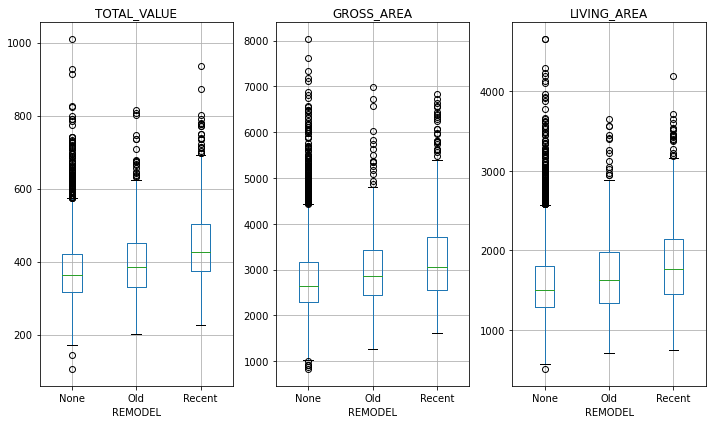

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (10, 6))

data_df.boxplot(column='TOTAL_VALUE', by='REMODEL', ax=axes[0])

data_df.boxplot(column='GROSS_AREA', by='REMODEL', ax=axes[1])

data_df.boxplot(column='LIVING_AREA', by='REMODEL', ax=axes[2])

for ax in axes:
    ax.set_xlabel('REMODEL')
    
plt.suptitle('')  # Suppress the overall title
plt.tight_layout()  # Increase the separation between the plots

plt.show()

#### Violin Plots

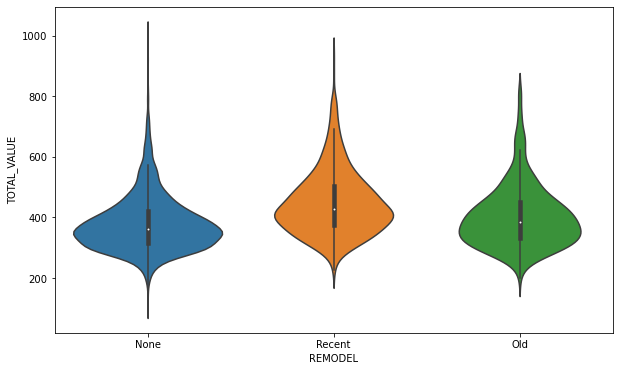

In [23]:
plt.figure(figsize=(10,6))

sns.violinplot(x='REMODEL', y='TOTAL_VALUE', data=data_df)

#### Histogram with KDE

[Text(0, 0.5, 'count'), Text(0.5, 0, 'Total Value')]

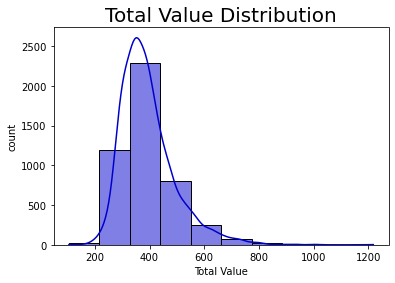

In [24]:
fig, ax = plt.subplots(1,1)

sns.histplot(data_df.TOTAL_VALUE, 
             bins=10,
             kde=True,
             label='TOTAL_VALUE', 
             color='mediumblue')

ax.set_title('Total Value Distribution', fontsize=20)
ax.set(xlabel='Total Value', ylabel='count')

#### Color Coded Correlation Chart with numeric values overlay

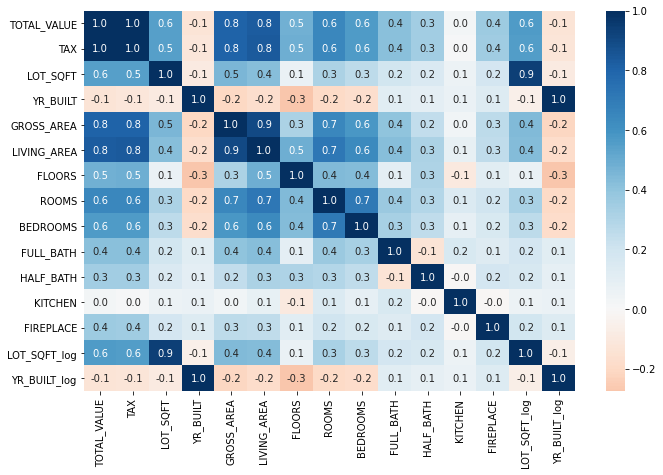

In [25]:
# color-coded heatmap with correlation values

corr = data_df.corr()

fig, ax = plt.subplots()

fig.set_size_inches(11, 7)

sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax) #  

plt.show()

#### Missing Value Analysis

In [26]:
# This shows missing values in a list format

pd.DataFrame({'miss.val': data_df.isnull().sum(),
             })

miss.val
TOTAL_VALUE        536
TAX                504
LOT_SQFT           513
YR_BUILT             0
GROSS_AREA         507
LIVING_AREA        526
FLOORS             529
ROOMS              546
BEDROOMS           520
FULL_BATH          504
HALF_BATH          498
KITCHEN            518
FIREPLACE          516
REMODEL            510
LOT_SQFT_log       513
YR_BUILT_log         0

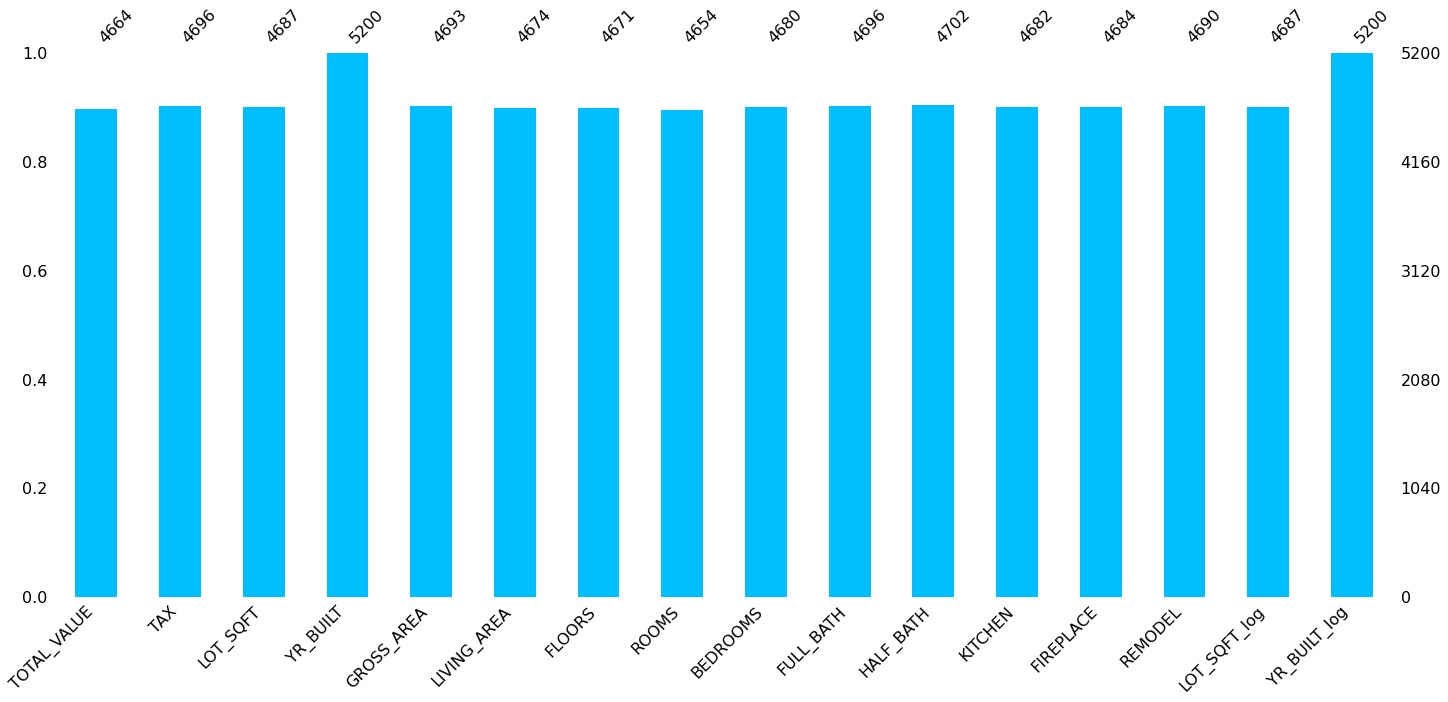

In [27]:
# This shows missing values in a bar chart format

msno.bar(data_df, color='deepskyblue')

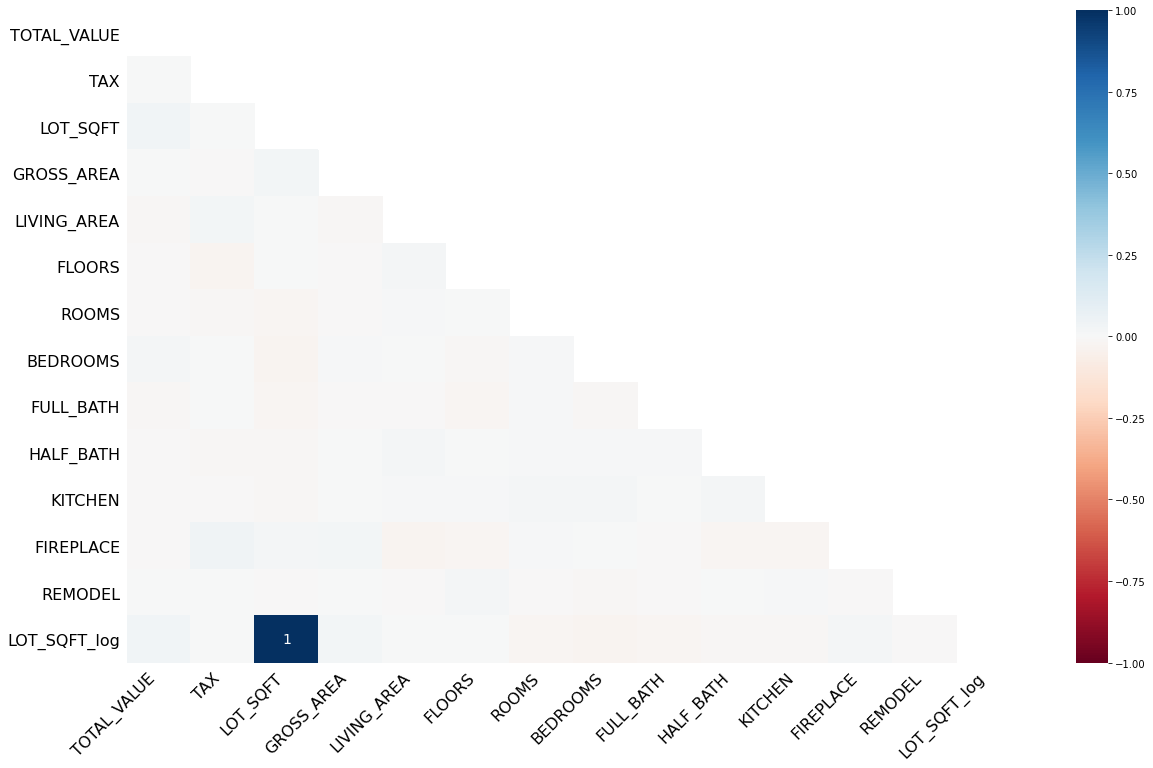

In [28]:
# This shows the nullity correlations

msno.heatmap(data_df)

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Shape of your Data Set: (5200, 16)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  13
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0

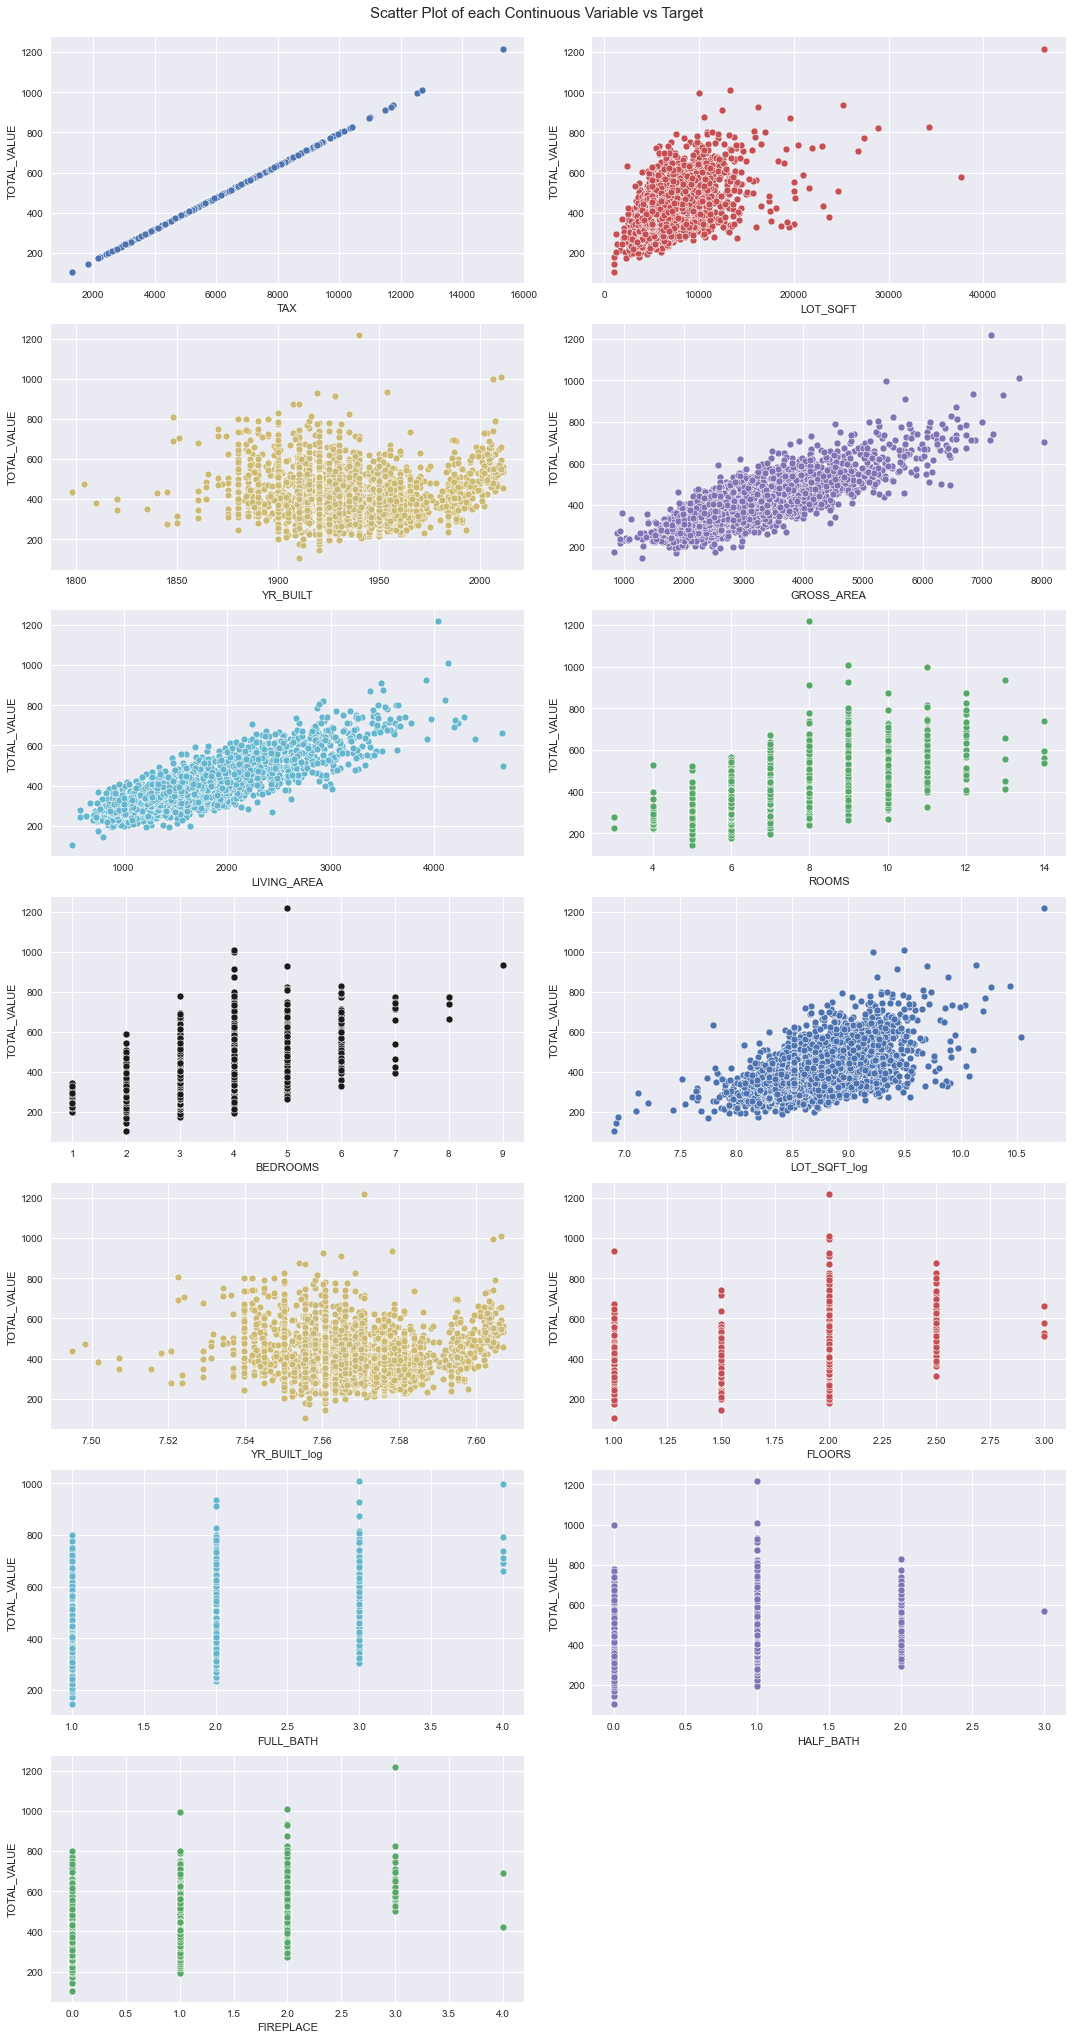

Number of All Scatter Plots = 91


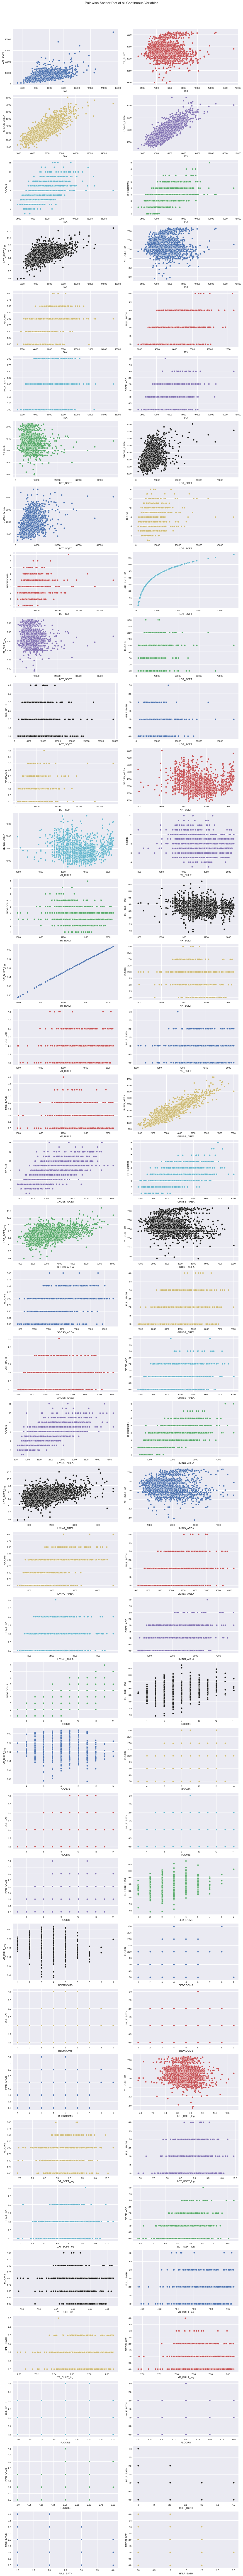

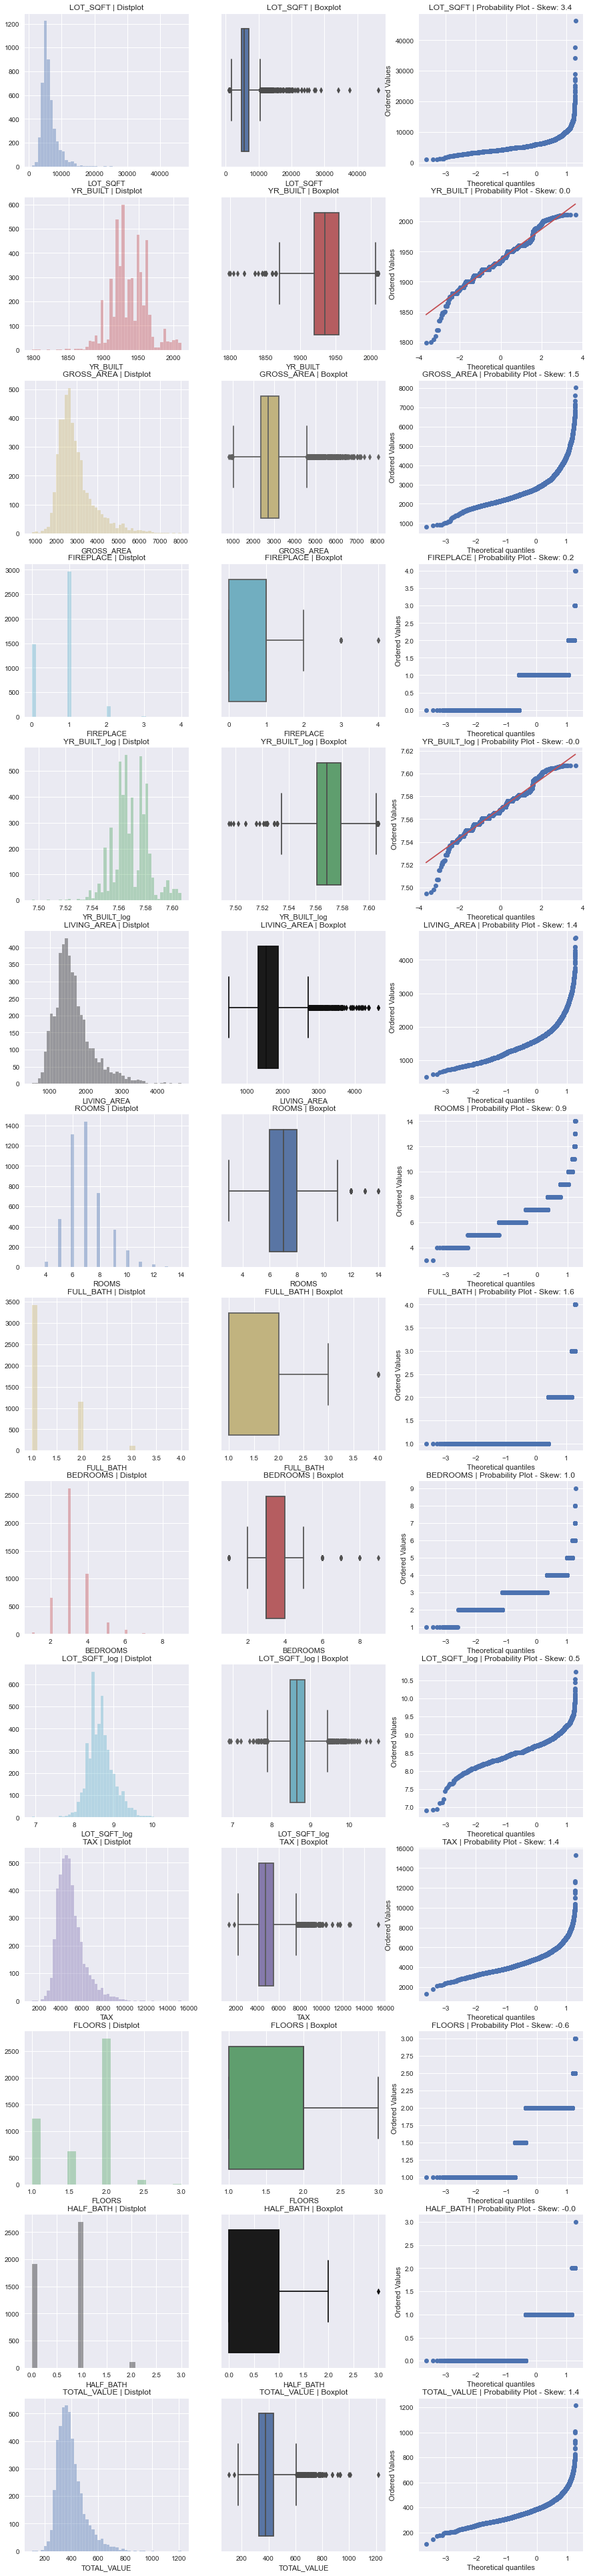

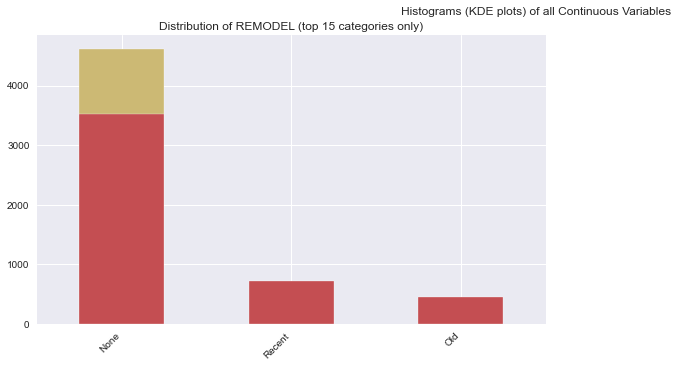

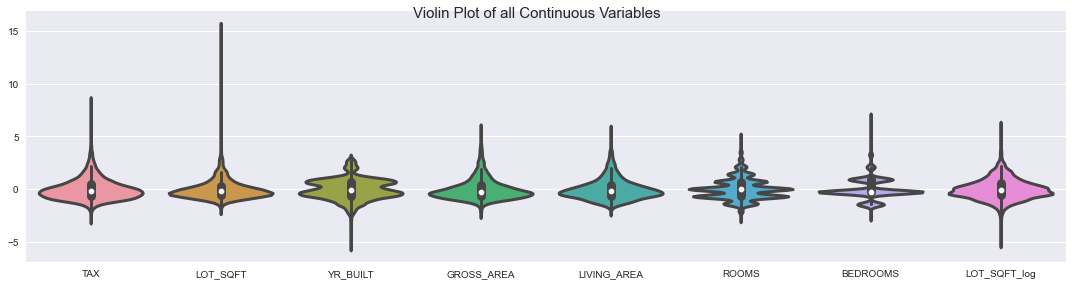

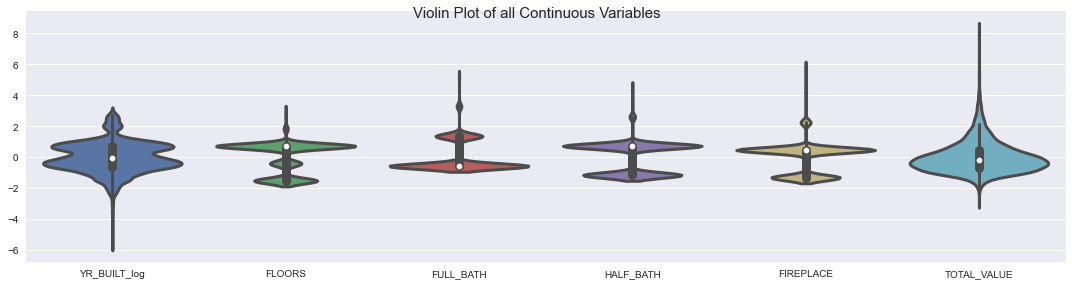

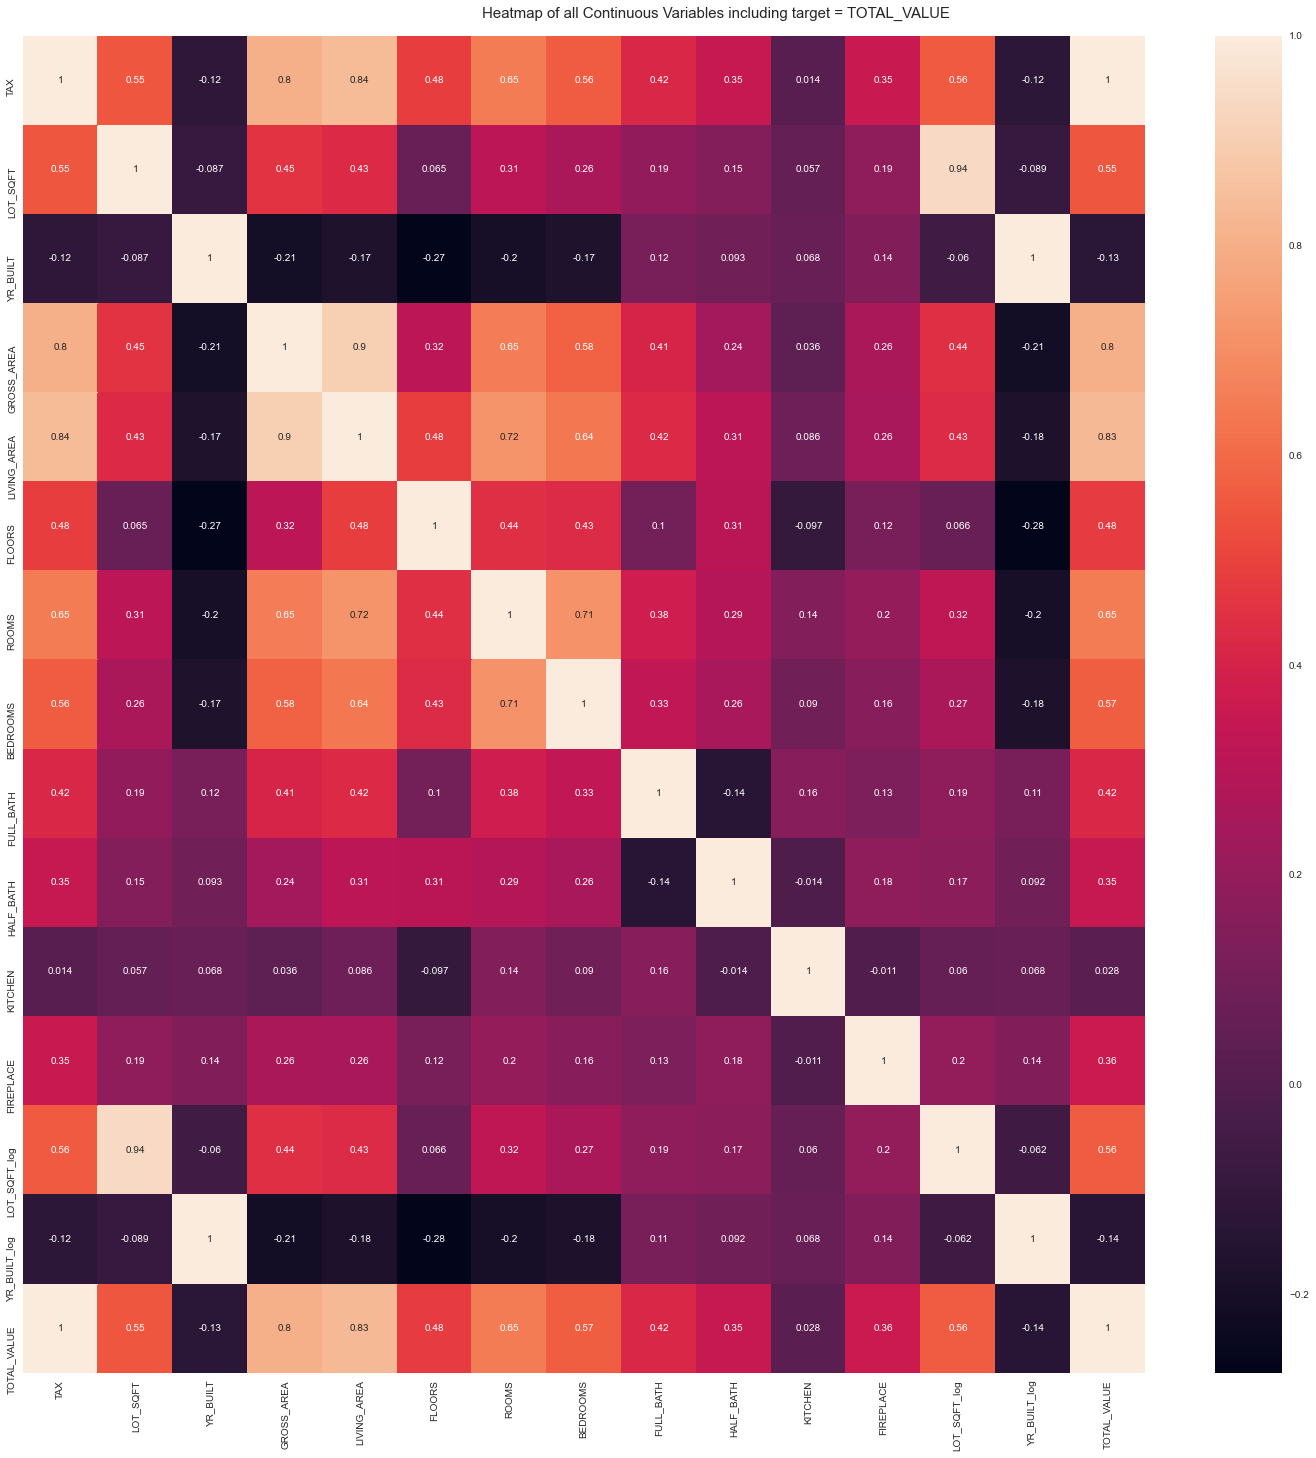

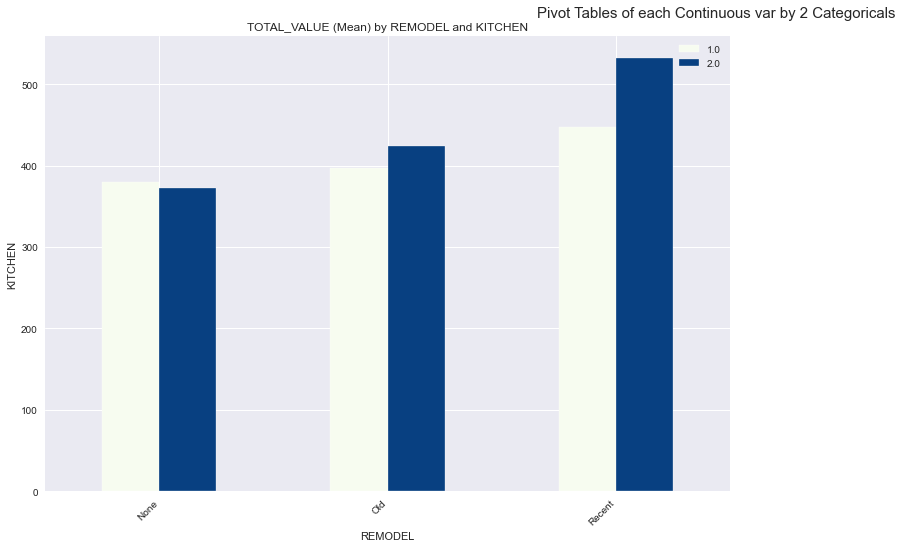

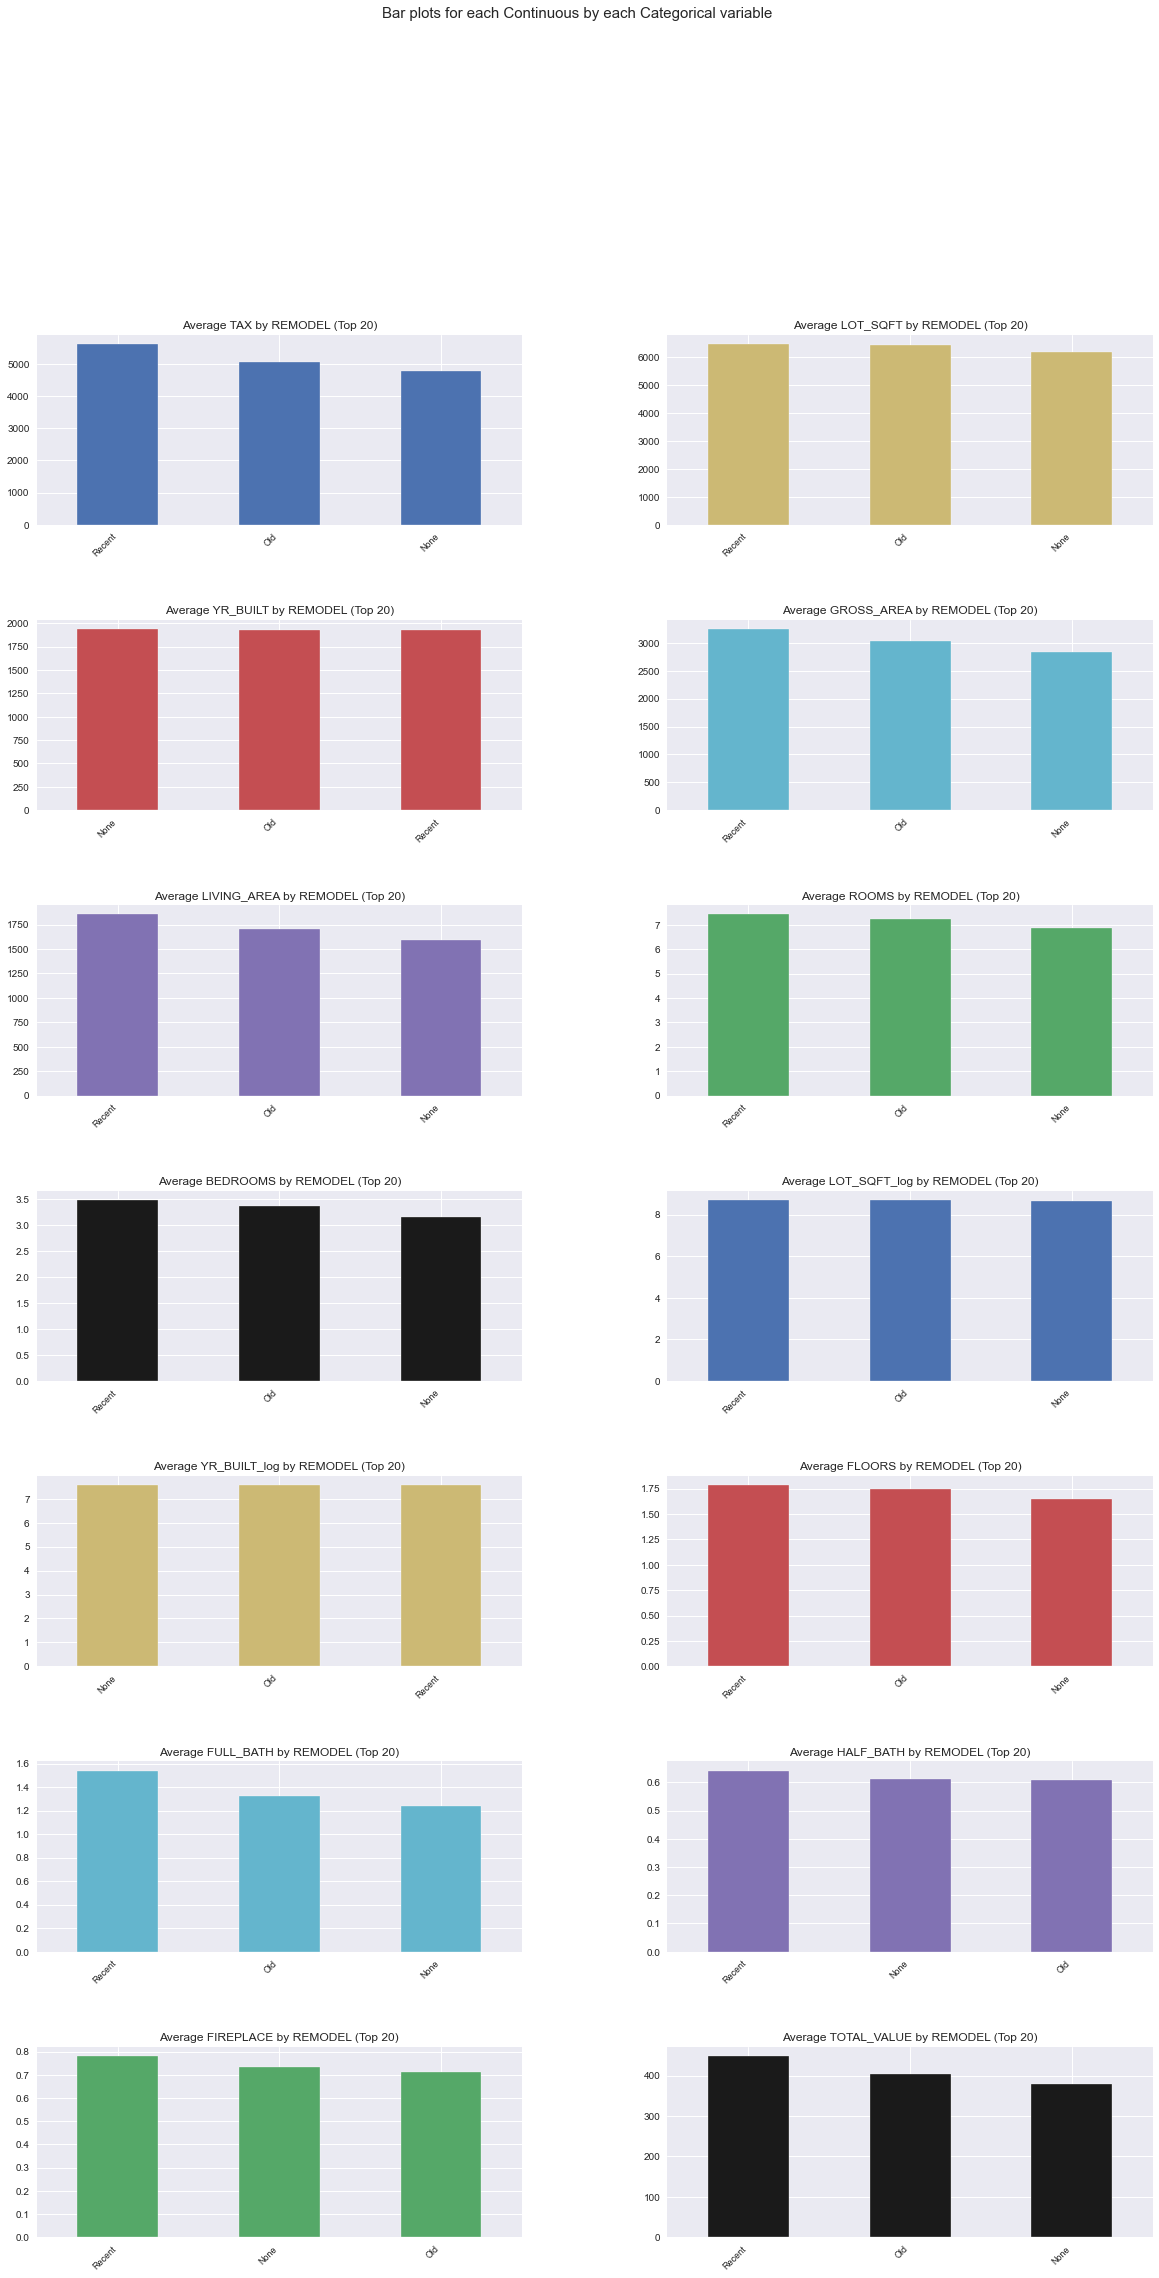

All Plots done
Time to run AutoViz (in seconds) = 25.521

 ###################### VISUALIZATION Completed ########################


In [29]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

filename = ""
separator = ","

dft = AV.AutoViz(
    filename,
    sep = separator,
    depVar="TOTAL_VALUE",
    dfte = data_df,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="png",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)